In [1]:
import os
import pandas as pd
pd.options.display.max_rows = 1000
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import seaborn as sns; sns.set(color_codes=True)

import sys
sys.getrecursionlimit()
sys.setrecursionlimit(10000)

import numpy as np
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

from collections import defaultdict

data_dir = "/Users/david/Dropbox (UCSD SBRG)/Xam_Multistrain_Recon/Metabolic_model/BiGG_Model/CSM/In_vitro"

#### Reading Table of Fluxes

In [2]:
Xam_void_fluxes = pd.read_csv('Xam_cluster-void.tsv', sep='\t', index_col=0, header=None, names=['rxn', 'Void'])
Xam_rpfCGH_fluxes = pd.read_csv('Xam_cluster-rpfCGH.tsv', sep='\t', index_col=0, header=None, names=['rxn', 'rpfCGH'])

Xam_void_xanth_fluxes = pd.read_csv('Xam_cluster_void_Xanth.tsv', sep='\t', index_col=0, header=None, names=['rxn', 'Void_Xanthan'])
Xam_rpfCGH_xanth_fluxes = pd.read_csv('Xam_cluster_rpfCGH_Xanth.tsv', sep='\t', index_col=0, header=None, names=['rxn', 'rpfCGH_Xanthan'])

In [3]:
xam_fluxes = pd.concat([Xam_void_fluxes, Xam_rpfCGH_fluxes, Xam_void_xanth_fluxes, Xam_rpfCGH_xanth_fluxes], axis=1, join='inner')
xam_fluxes_2 = xam_fluxes.fillna(value=0)
xam_fluxes_2 = xam_fluxes_2[(xam_fluxes_2.T != 0).any()]

In [15]:
xam_fluxes_2

,Void,rpfCGH,Void_Xanthan,rpfCGH_Xanthan
rxn,,,,
A5PISO,-0.00740,-0.00740,-0.00740,-0.00740
AACOAR_syn,1000.00000,1000.00000,1000.00000,1000.00000
ACACT1,-0.00840,-0.00840,-0.00840,-0.00840
ACAS_2ahbut,-0.03224,-0.03224,-0.03224,-0.03224
ACBIPGT,-0.00031,-0.00031,-0.00031,-0.00031
ACCOAC,1000.00000,1000.00000,1000.00000,1000.00000
ACGK,-0.02463,0.00000,-0.02463,0.00000
ACGS,-0.02463,0.00000,-0.02463,0.00000
ACOAD8m,-0.00840,-0.00840,-0.00840,-0.00840


In [20]:
xam_fluxes_2.to_csv('Xam_results.csv')

#### Calculating Linkage Matrix

In [5]:
xam_fluxes_array = pd.DataFrame.as_matrix(xam_fluxes_2)
xam_fluxes_array.shape
Z = linkage(xam_fluxes_array, metric='euclidean', method='ward',)
c, coph_dists = cophenet(Z, pdist(xam_fluxes_array))
c

0.92484248735646979

#### Calculating Full Dendrogram

In [6]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Xam')
plt.xlabel('Reaction Fluxes')
plt.ylabel('Distance')
den = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=0.25*max(Z[:,2]),
)

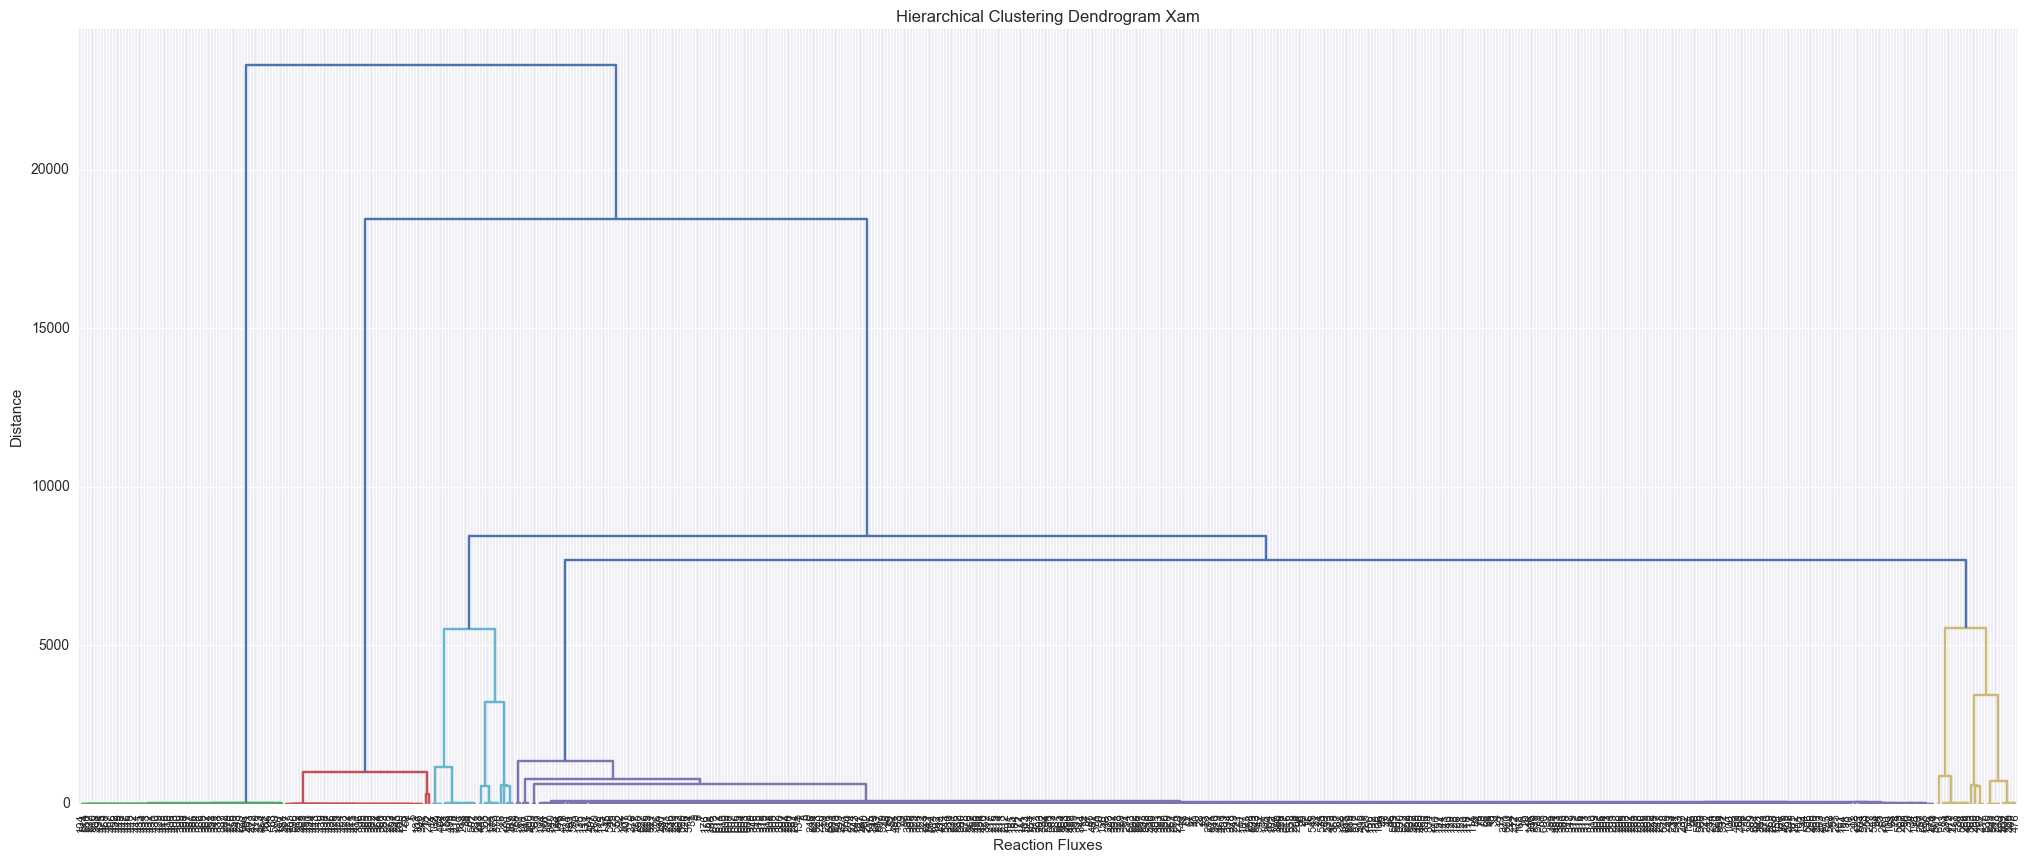

In [7]:
plt.show(den)
#den

#### Mapping Index and Reactions

In [26]:
xam_map_index = pd.read_csv('Xam_results.csv', sep=',', header=0, usecols=['rxn'])
xam_map_index.index.name = 'index'
xam_map_index

,rxn
index,
0,A5PISO
1,AACOAR_syn
2,ACACT1
3,ACAS_2ahbut
4,ACBIPGT
5,ACCOAC
6,ACGK
7,ACGS
8,ACOAD8m


#### Mapping Groups to Dataframe of Fluxes

In [27]:
#del df_groups
df_groups = pd.DataFrame.from_dict(den["ivl"], dtype=int)
df_groups['group'] = pd.DataFrame.from_dict(den["color_list"])
df_groups.set_index(0, inplace=True)
df_groups.index.name = 'index'
df_groups

,group
index,
104,g
514,g
550,g
537,g
510,g
508,g
494,g
475,g
468,g


In [28]:
#del df_fluxes_groups
df_fluxes_groups = pd.concat([xam_map_index, df_groups], axis=1, join='inner')
df_fluxes_groups.set_index('rxn', inplace=True)
df_fluxes_groups

,group
rxn,
DMORh,g
PLIPA2A140pp,g
SADT,g
PYK,g
PLIPA1A140pp,g
PIabc,g
P5CRx,g
NDPK8,g
NADTRHD,g


In [29]:
xam_fluxes_groups = pd.concat([xam_fluxes_2, df_fluxes_groups], axis=1, join='inner')
xam_fluxes_groups

,Void,rpfCGH,Void_Xanthan,rpfCGH_Xanthan,group
rxn,,,,,
DMORh,-999.92765,-999.92765,-999.92765,-999.92765,g
PLIPA2A140pp,-1000.00000,-999.99895,-1000.00000,-999.99895,g
SADT,-1000.00000,-1000.00000,-1000.00000,-1000.00000,g
PYK,-1000.00000,-1000.00000,-1000.00000,-1000.00000,g
PLIPA1A140pp,-1000.00000,-1000.00000,-1000.00000,-1000.00000,g
PIabc,-1000.00000,-1000.00000,-1000.00000,-1000.00000,g
P5CRx,-1000.00000,-1000.00000,-1000.00000,-1000.00000,g
NDPK8,-1000.00000,-1000.00000,-1000.00000,-1000.00000,g
NADTRHD,-1000.00000,-1000.00000,-1000.00000,-1000.00000,g


In [30]:
xam_fluxes_groups.to_csv('Xam_results_grouped.csv')

#### Coloring

In [31]:
#Color palet
group_pal = sns.color_palette(n_colors=len(xam_fluxes_groups.group.unique())) #n_colors=len(xam_fluxes_groups.group.unique())
group_lut = dict(zip(xam_fluxes_groups.group.unique(), group_pal))
group = xam_fluxes_groups.group
#print(group)
group_colors = pd.Series(group).map(group_lut)
print(group_colors)

rxn
DMORh                   (0.298039215686, 0.447058823529, 0.690196078431)
PLIPA2A140pp            (0.298039215686, 0.447058823529, 0.690196078431)
SADT                    (0.298039215686, 0.447058823529, 0.690196078431)
PYK                     (0.298039215686, 0.447058823529, 0.690196078431)
PLIPA1A140pp            (0.298039215686, 0.447058823529, 0.690196078431)
PIabc                   (0.298039215686, 0.447058823529, 0.690196078431)
P5CRx                   (0.298039215686, 0.447058823529, 0.690196078431)
NDPK8                   (0.298039215686, 0.447058823529, 0.690196078431)
NADTRHD                 (0.298039215686, 0.447058823529, 0.690196078431)
NADK                    (0.298039215686, 0.447058823529, 0.690196078431)
MTI                     (0.298039215686, 0.447058823529, 0.690196078431)
MNXR94264               (0.298039215686, 0.447058823529, 0.690196078431)
MNXR94260               (0.298039215686, 0.447058823529, 0.690196078431)
MNXR94259               (0.298039215686, 0.4470

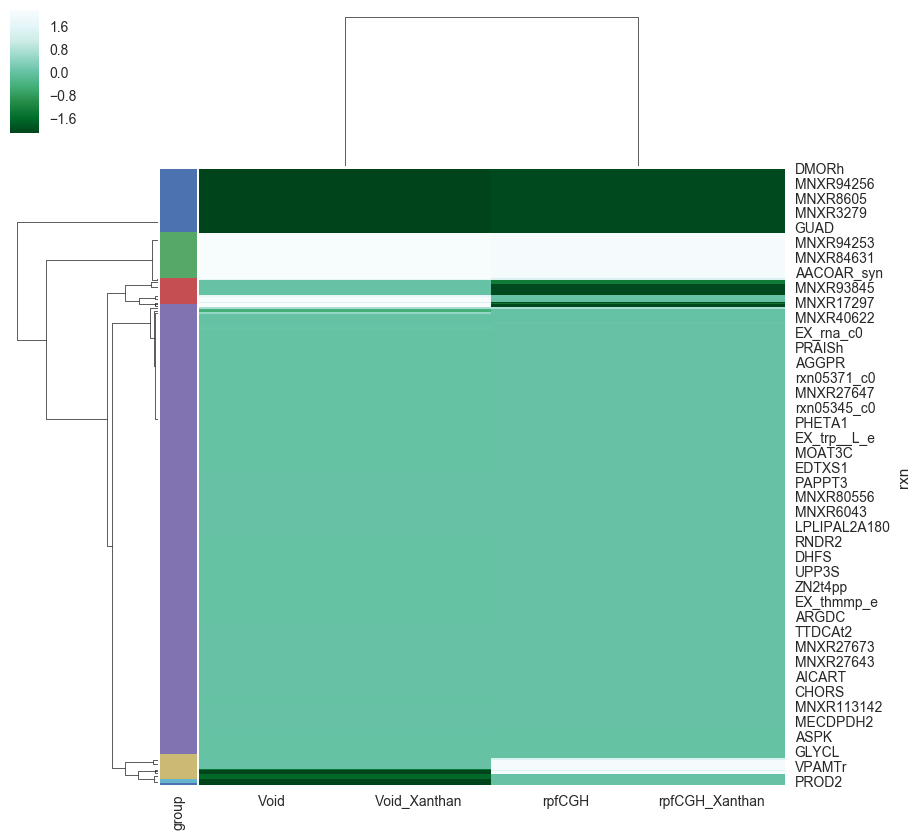

In [32]:
flux_distr_2 = sns.clustermap(xam_fluxes_2, z_score=1, row_linkage=Z, row_colors=group_colors, cmap='BuGn_r')
flux_distr_2.fig

In [34]:
plt.savefig("Xam-Hierarchically-clustered_heatmap-z_score-dendrogram_colored.png", format='png', dpi=800)